In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')


# Problem Statement
## Prepare a prediction model for profit of 50_startups data.
+ <b>Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.</b>

### Features
+ <b>R&D Spend</b>      -- Research and devolop spend in the past few years
+ <b>Administration</b>  -- spend on administration in the past few years
+ <b>Marketing Spend</b> -- spend on Marketing in the past few years
+ <b>State</b>          -- states from which data is collected
+ <b>Profit</b>          -- profit of each state in the past few years

## Importing Dataset

In [2]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Descriptive Analysis

In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Renaming the columns name to make it short 

In [4]:
df1 = df.copy()
df1 = df.rename({'R&D Spend':'RnD', 'Administration':'admin','Marketing Spend':'marketing','State':'state','Profit':'profit'},axis = 1)

In [5]:
df1

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
### Checking for missing values

In [7]:
df1.isnull().sum()

RnD          0
admin        0
marketing    0
state        0
profit       0
dtype: int64

In [8]:
df1[df1.values==0.0]

,RnD,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


### In data there is some '0' values in some features, so  no money is spend regards to that Department

### Checking for Duplicated Values

In [9]:
df1[df1.duplicated()].shape

(0, 5)

In [10]:
df1[df1.duplicated()]

,RnD,admin,marketing,state,profit


#### There is no duplicate value in the data set 

### There is no duplicated values in the data set 



### Visualizing Continuous Datatype for Outlier Detection 

In [11]:
continuous_feature = [feature for feature in df1.columns if df1[feature].dtype!= 'O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


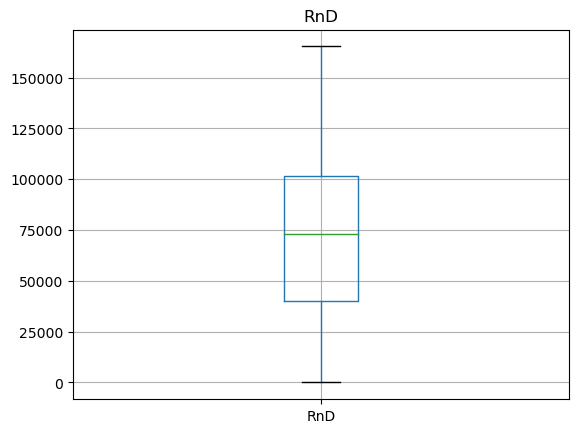

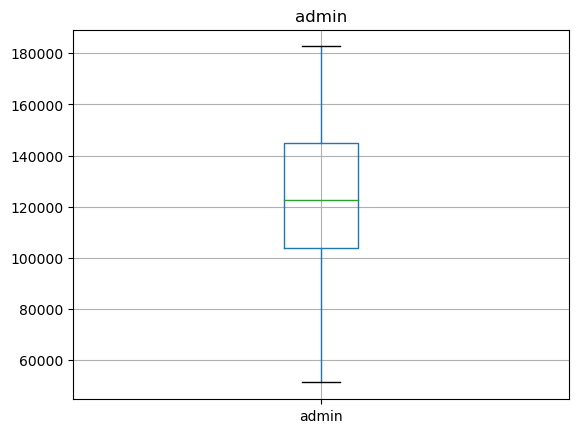

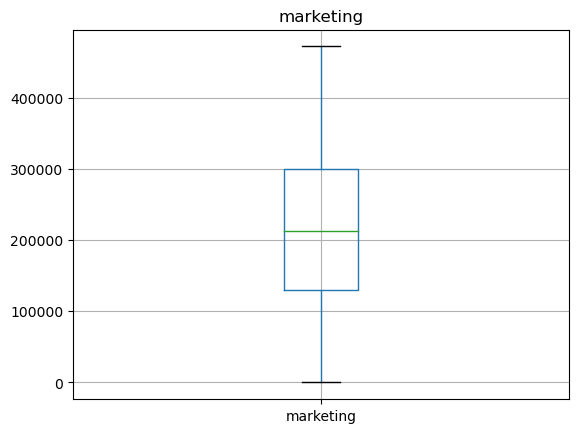

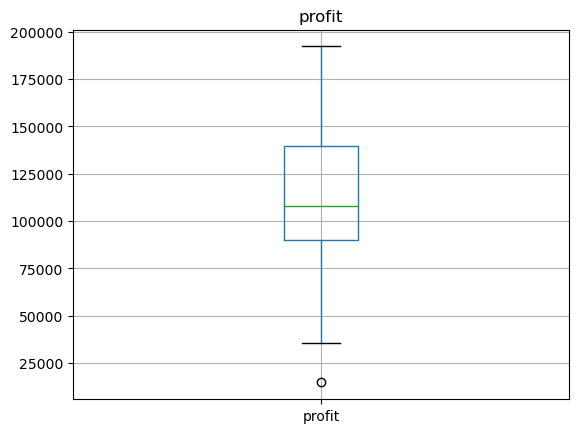

In [12]:
for feature in continuous_feature:
    df=df1.copy()
    df.boxplot(column=feature)
    plt.title(feature)
    plt.show()

### From above visualization we can conclude that there is an outlier in Profit that is our Dependent Variable but there are no Outlier in our Dependent Features 

#### Lets try to find the outlier in the profit dependent variable 

In [13]:
Q1 = np.quantile(df.profit,0.25)
Q3 = np.quantile(df.profit,0.75)
med = np.median(df.profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [14]:
Outliers = df.profit[(df.profit <= lower_bound) | (df.profit >=upper_bound)]
print('The outlier in the boxplot:' , Outliers)

The outlier in the boxplot: 49    14681.4
Name: profit, dtype: float64


In [15]:
display(df[df.index.isin([49])],df.head())

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


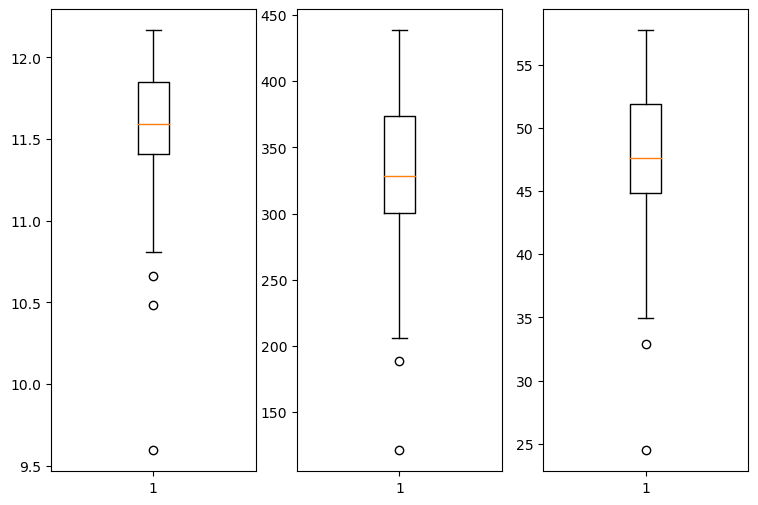

In [16]:
plt.subplots(figsize =(9,6))
plt.subplot(131)
plt.boxplot(np.log(df['profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['profit']))
plt.show()



### Even after transformation we are not able to remove outlier

### Lets build a model and compare its R-squared value with other techniques to see which technique suits best for this case

In [17]:
raw_model = sm.ols('profit~RnD+admin+marketing',data = df1).fit()

In [18]:
# Finding rsquared values
raw_model.rsquared,raw_model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

### Lets apply Median imputation to handle Outlier in Profit

In [19]:
df1.profit.median()

107978.19

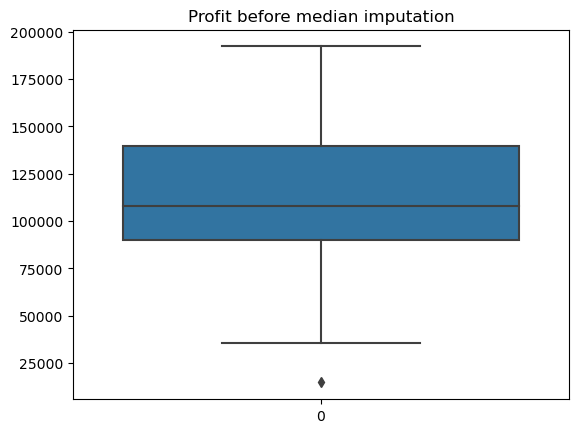

In [20]:
df2 = df1.copy()
sns.boxplot(df['profit'])
plt.title('Profit before median imputation')
plt.show()

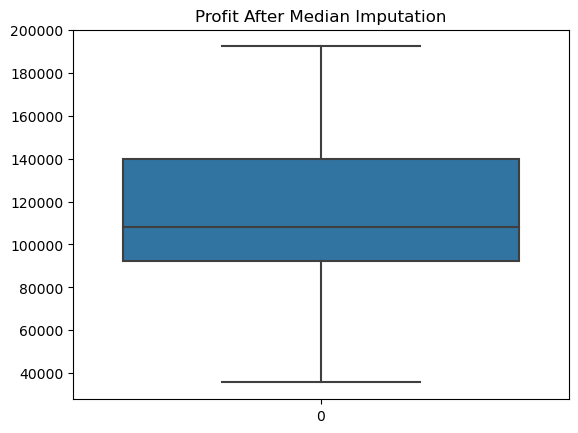

In [21]:
### Lets see profit after median imputation 
for i in df2['profit']:
    q1 = np.quantile(df.profit,0.25)
    q3 = np.quantile(df.profit,0.75)
    med = np.median(df.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    if i> upper_bound or i < lower_bound:
        df2['profit'] = df2['profit'].replace(i,np.median(df1['profit']))
sns.boxplot(df2['profit'])
plt.title('Profit After Median Imputation')
plt.show()

### Lets test our data in model and compare the R-squared with Median imputation data model

In [22]:
after_median_imputation_model = sm.ols("profit~RnD+admin+marketing", data = df2).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.9182958360807372, 0.91296730365122)

### As  we can see that after median imputation the model is not performing well So now we have to try something else

### Lets try Mean Imputation to handle Outlier in Profit

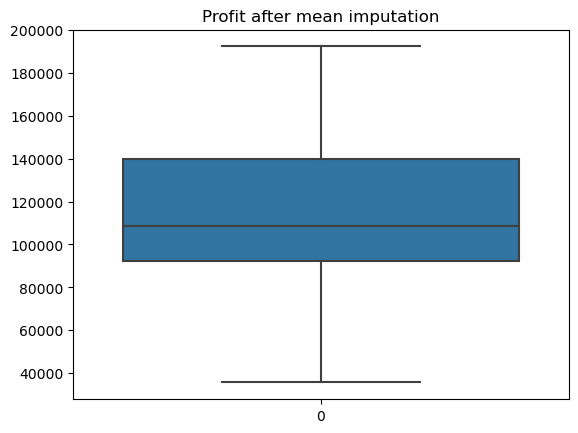

In [23]:
df3 = df1.copy()
for i in df3['profit']:
    q1 = np.quantile(df3.profit,0.25)
    q3 = np.quantile(df3.profit,0.75)
    med = np.median(df3.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df3['profit'] = df3['profit'].replace(i,np.mean(df3['profit']))
sns.boxplot(df3['profit'])
plt.title('Profit after mean imputation')
plt.show()

### Lets test our data in model and compare the R-squared with Mean imputation data model

In [24]:
after_mean_imputation_model = sm.ols('profit~RnD+admin+marketing',data = df3).fit()
# finding rsquared values 
after_mean_imputation_model.rsquared, after_mean_imputation_model.rsquared_adj

(0.9119537155310937, 0.9062115665439912)

#### ^Observation: As you can see after mean imputation the model is not performing well it got a little worse than the median one
+ Now we have to try something else to get out better results than the raw data

### Lets Remove the outlier and see results

In [25]:
df4 = df1.copy()
def drop_outliers(df,field_name):
    iqr = 1.5*(np.percentile(df[field_name],75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name],75))].index, inplace = True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name],25) - iqr)].index, inplace= True)

In [26]:
drop_outliers(df4, 'profit')
sns.boxplot(df4.profit)
plt.title('Profit after removing outliers')

Text(0.5, 1.0, 'Profit after removing outliers')

In [27]:
removed_outlier_model = sm.ols("profit~RnD+admin+marketing", data = df4).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

### As we can see that Slightly better score than the raw data model

## Exploratory Data Anlaysis

### Visualizing the Distribution of Independent Features with the help of Histograms

In [28]:
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)

In [29]:
plot_data(df4,'RnD')
plt.title('R&D Spend')
plot_data(df4,'admin')
plt.title('Administration')
plot_data(df4,'marketing')
plt.title('Marketing')
plot_data(df4,'profit')
plt.title('Profit')

Text(0.5, 1.0, 'Profit')

In [30]:
plt.figure(figsize=(8,8))
df4['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df3['state'].value_counts().sum())))

<Axes: ylabel='state'>

In [31]:
df4.state.value_counts()

New York      17
California    16
Florida       16
Name: state, dtype: int64

### As we can observe that the categorical state feature has balanced data all the unique values are approximately equally distributed

### Visualizing the Relation between each independent feature with respect to the dependent feature 

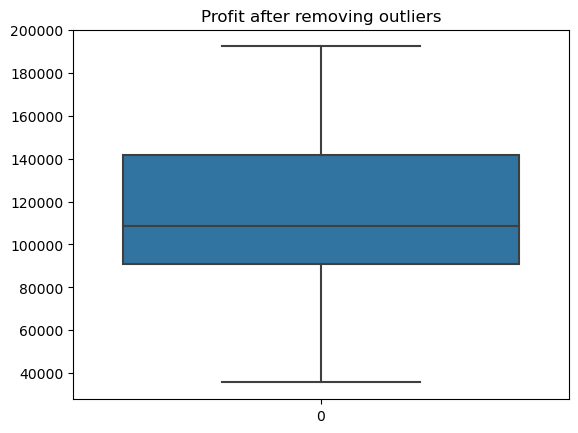

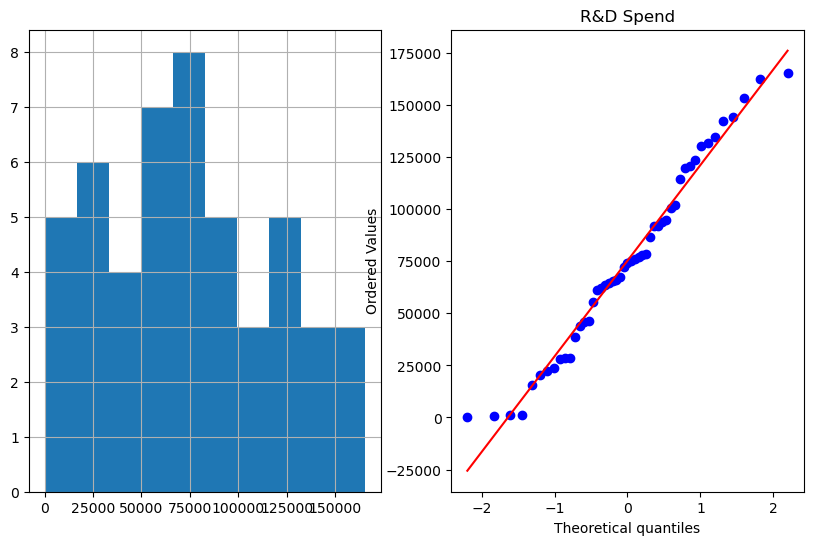

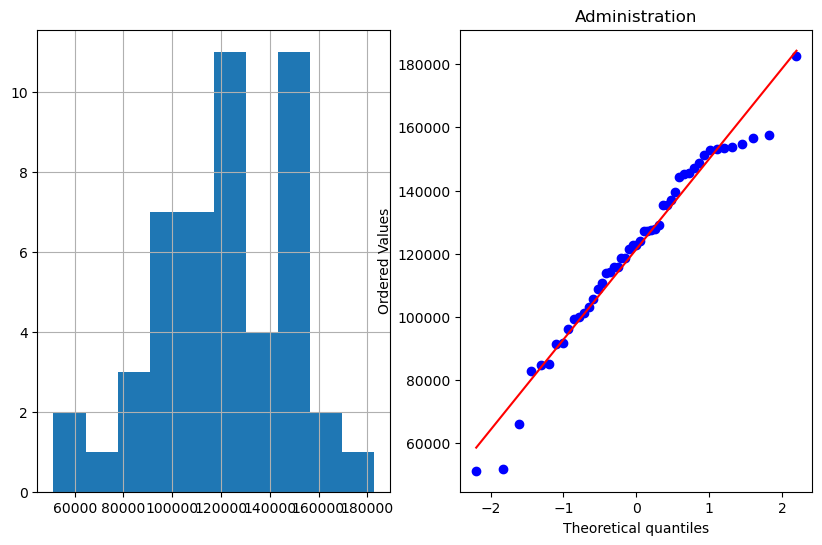

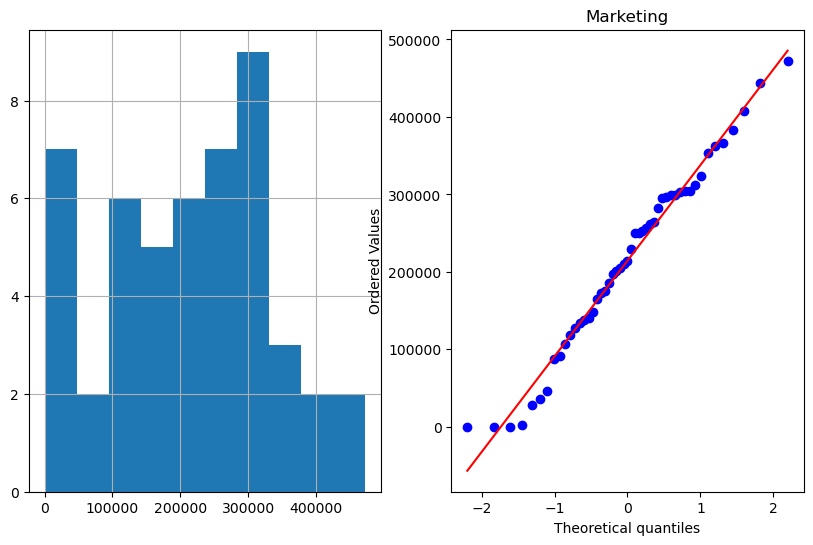

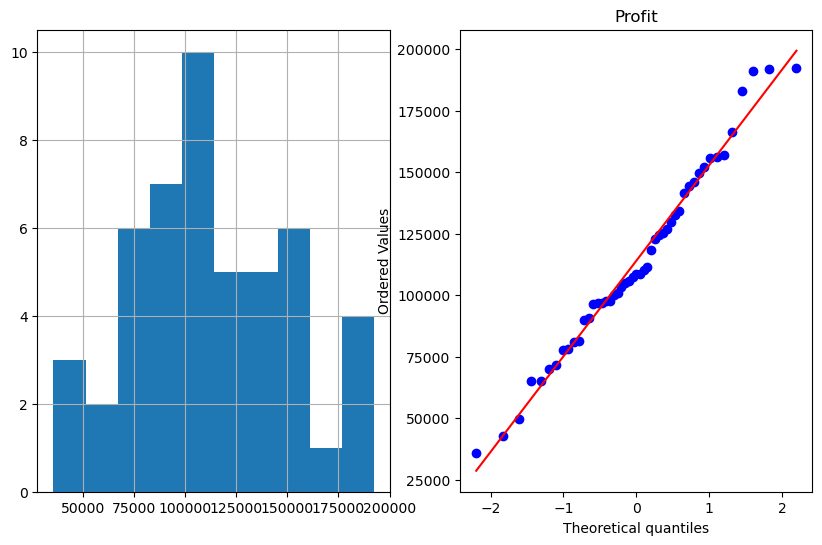

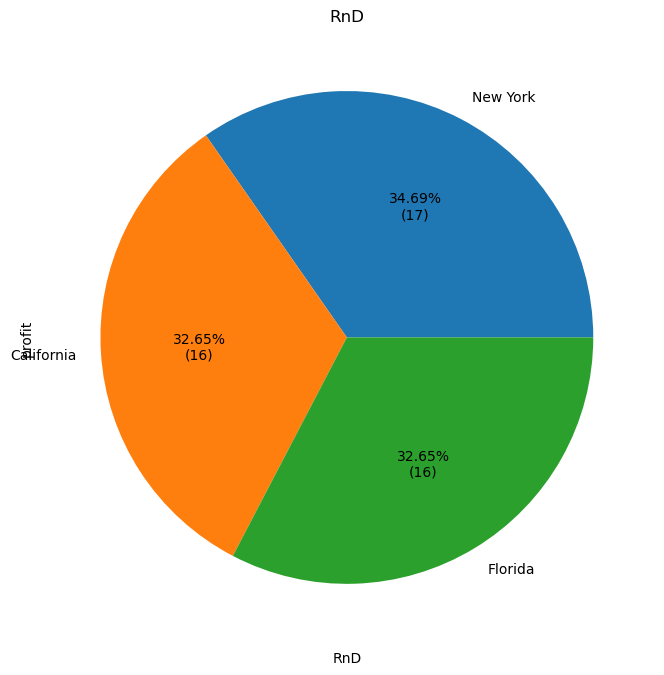

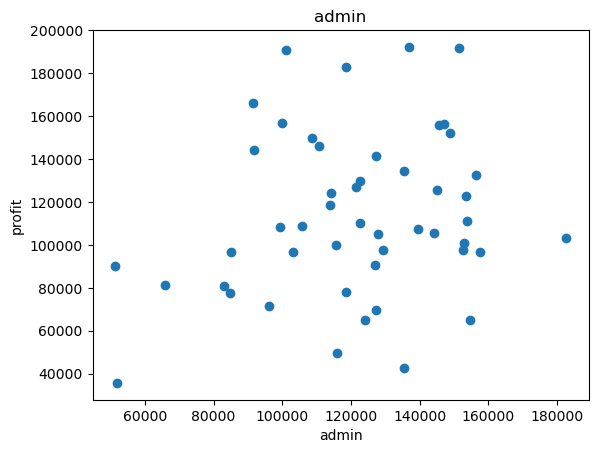

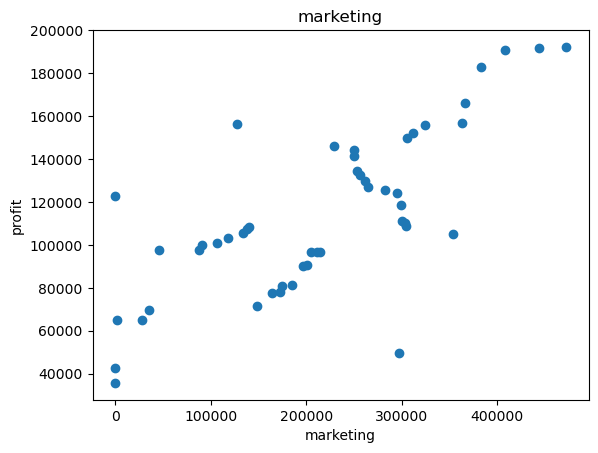

In [32]:
for feature in continuous_feature:
    if feature!="profit":
        data=df4.copy()         
        plt.scatter(data[feature],data['profit'])
        plt.xlabel(feature)
        plt.ylabel('profit')
        plt.title(feature)
        plt.show()

 ### As we can see R&D feature has a good linear relation with Profit as compare to other features

In [33]:
ax = sns.barplot(x= 'state',y =  'profit', data = df4)
for i in ax.containers:
    ax.bar_label(i,)


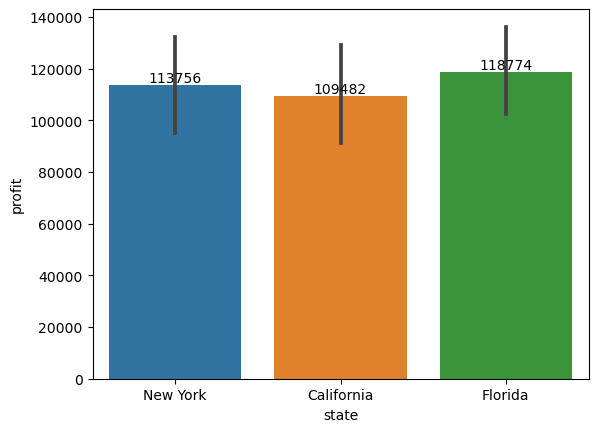

In [34]:
plt.show()

#### As we can see there isn't much  of diffrence between how much profit each state generates from each other and there isn't  any direct relation

In [35]:
df5 = df4.drop('state',axis=1)
df5.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [36]:
df5.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.243438,0.711654,0.978437
admin,0.243438,1.000000,-0.037280,0.205841
marketing,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df5.corr(),
    annot=True)

<Axes: >

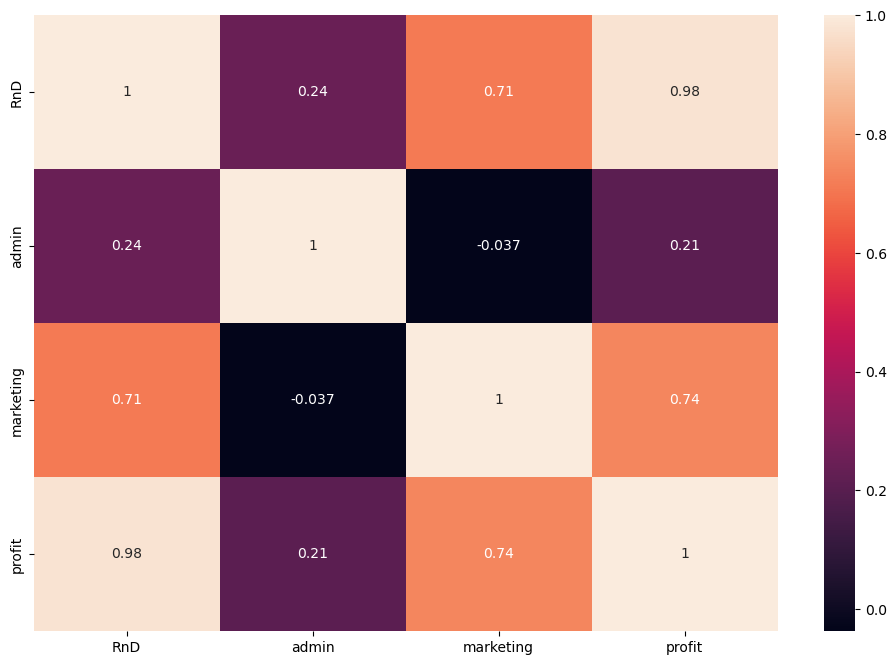

In [38]:
plt.show()

 #### R&D has the highest score of correlation with Profit

### Feature Engineering

#### Applying some data transformation to increase the linear relationship and improve our model prediction as well it scores

In [39]:
df_standard_scaled = df5.copy()

In [40]:
features = df_standard_scaled[continuous_feature]

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,RnD,admin,marketing,profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


### Preparing a Model 

In [42]:
import statsmodels.formula.api as sm
model  = sm.ols('profit~RnD+admin+marketing', data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           8.85e-32
Time:                        15:01:37   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.839e-16      0.029  -6.27e-15      1.000      -0.059       0.059
RnD            0.9254      0.045     20.470      0.000       0.834       1.017
admin         -0.0165      0.032     -0.518      0.607      -0.080       0.048
marketing      0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
display(model.tvalues,model.pvalues)

Intercept   -6.271596e-15
RnD          2.046950e+01
admin       -5.178888e-01
marketing    1.825383e+00
dtype: float64

Intercept    1.000000e+00
RnD          1.971077e-24
admin        6.070728e-01
marketing    7.458443e-02
dtype: float64

#### Here, (Intercept) Beta0 p_value ~ 1
#### Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
#### Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

#### As we can see that the p_value is not less than 0.05  for  Administration and Marketing features.So we fail to reject null hypothesis.

In [44]:
admin_model = sm.ols('profit~admin',data = df_standard_scaled).fit()
display(admin_model.tvalues, admin_model.pvalues)

Intercept   -1.288209e-15
admin        1.442053e+00
dtype: float64

Intercept    1.000000
admin        0.155918
dtype: float64

In [45]:
admin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.156
Time:                        15:01:38   Log-Likelihood:                -68.467
No. Observations:                  49   AIC:                             140.9
Df Residuals:                      47   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.839e-16      0.143  -1.29e-15      1.000      -0.287       0.287
admin          0.2058      0.143      1.442      0.156      -0.081       0.493
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
marketing_model = sm.ols("profit~marketing", data = df_standard_scaled).fit()

In [47]:
marketing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.30e-09
Time:                        15:01:38   Log-Likelihood:                -50.150
No. Observations:                  49   AIC:                             104.3
Df Residuals:                      47   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.839e-16      0.098  -1.87e-15      1.000      -0.198       0.198
marketing      0.7393      0.098      7.527      0.000       0.542       0.937
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Marketing feature alone can explain 54% and Adminstration at 4% of the variance with repect to the profit if acknowledged there are other features as well 
+ The p_value of Administration is greater than 0.5 hence by the test of independence, we fail to reject Null Hypothesis
+ We have found lack of evidence to state that administration has any dependency with respect to Profit atleast in this testing

### Lets Calculate the VIF(Variance inflation Factor)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as  vif
x = df_standard_scaled[['marketing','admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] =x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,admin,1.175172
0,marketing,2.239957
2,RnD,2.377754


#### As we can observe this test is not giving us much of an information to come up to an conclusion

### Let's build two model in each model one of the feature will not be present and then we will come to an conclusion to remove which of the feature by comparing the model parameters

In [53]:
admin_model1 = sm.ols('profit~RnD+admin', data = df5).fit()
admin_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.69e-32
Time:                        15:14:54   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RnD            0.8349      0.026     31.847      0.000       0.782       0.888
admin         -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


<Figure size 1600x900 with 0 Axes>

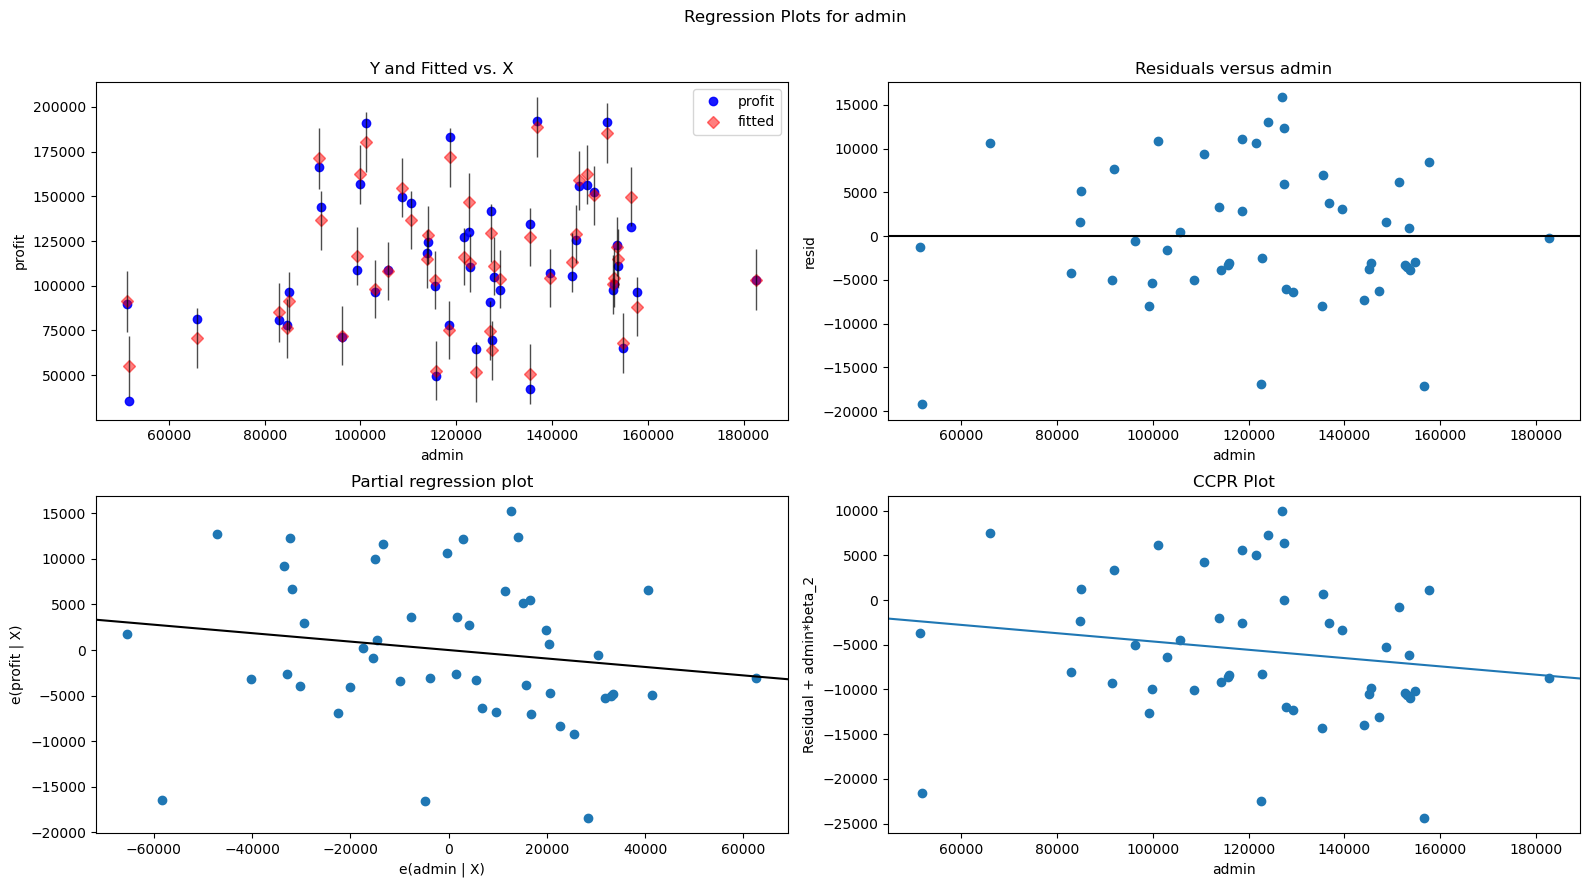

In [54]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(admin_model1, 'admin', fig=fig)
plt.show()

In [55]:
marketing_model1= sm.ols('profit~RnD+marketing', data= df5).fit()
marketing_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           3.74e-33
Time:                        15:17:26   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


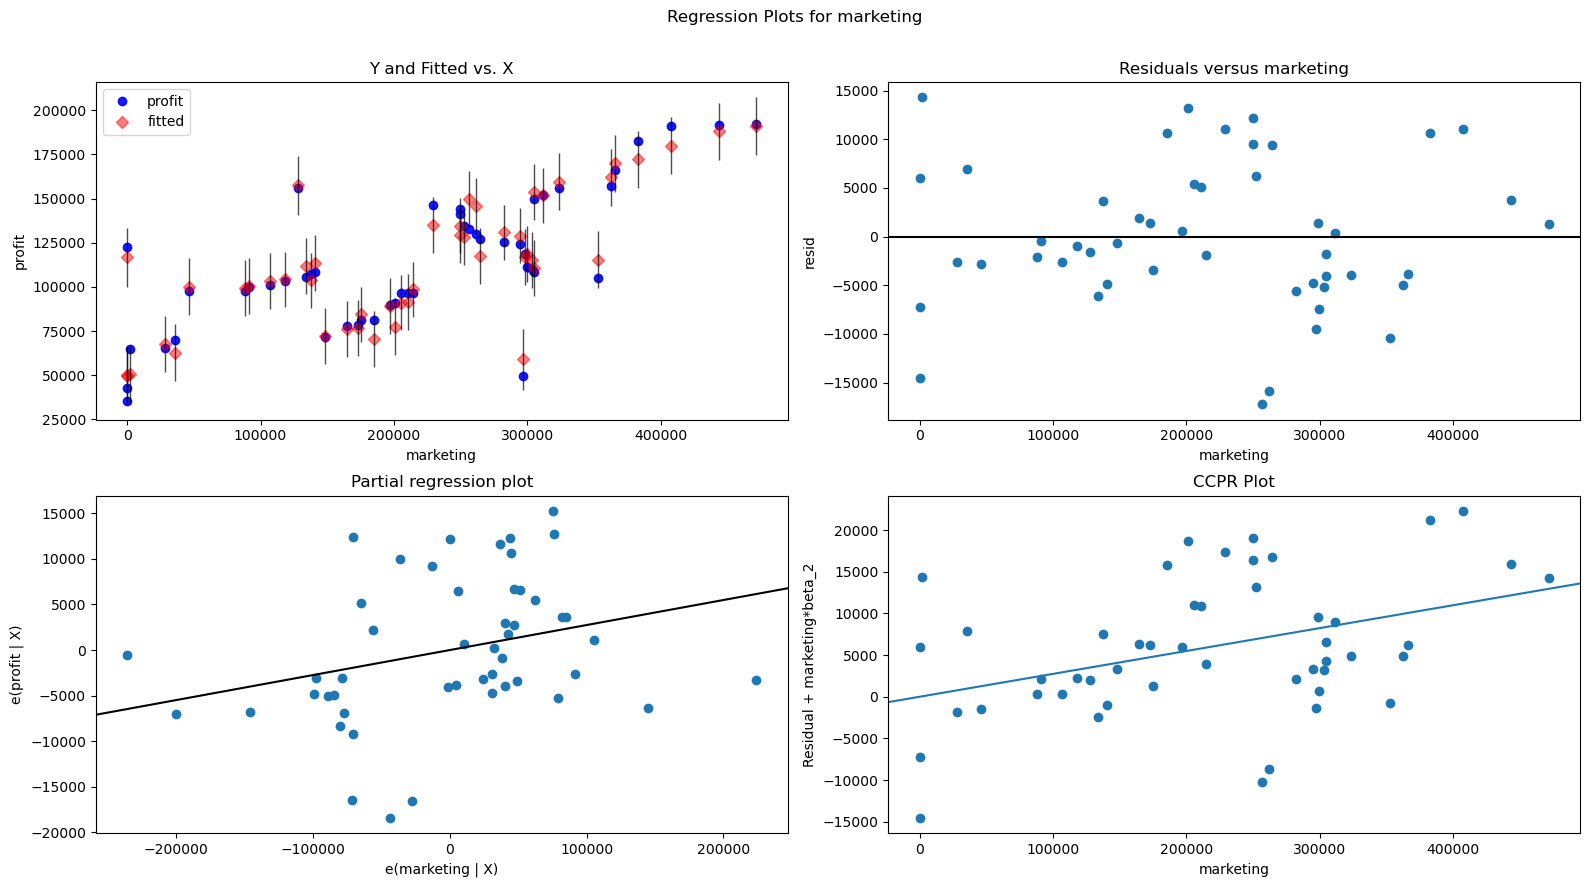

In [56]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(marketing_model1, 'marketing', fig=fig)
plt.show()

All our Assumptions are satisfied by the above model
+ Feature should be independent of each other there should'nt be any dependency upon each other 
+ it is satisfied by the model using Marketing feature
+ While building a model using Marketing we got better results better AIC, BIC, R-squared, R-squared adjusted, p_value(Test of Independence) and F-statistics score by comparing it with the model in which Adminstration feature was used.

#### Let's compare the residuals of both the model to come up with an conclusion

#### Model Validation

#### Comparing different models with respect to their Root Mean Squared Errors

In [57]:
df_standard_scaled.columns

Index(['RnD', 'admin', 'marketing', 'profit'], dtype='object')

In [60]:
print('Administration  Model= ',np.sqrt(admin_model1.mse_resid))

Administration  Model=  7947.922013017299


In [62]:
print('Marketing Model= ',np.sqrt(marketing_model1.mse_resid))

Marketing Model=  7691.884748549172


In [64]:
rmse_compare = {'Adminstration Model': np.sqrt(admin_model1.mse_resid),'Marketing Model': np.sqrt(marketing_model.mse_resid)}
min(rmse_compare, key=rmse_compare.get)

'Marketing Model'

#### The model that was build without using Administration feature performed very well.          So we are going to rebuild the model by dropping the administration feature

In [66]:
final_model = sm.ols('profit~RnD+marketing',data = df5).fit()

In [67]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           3.74e-33
Time:                        15:37:35   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Analysis 

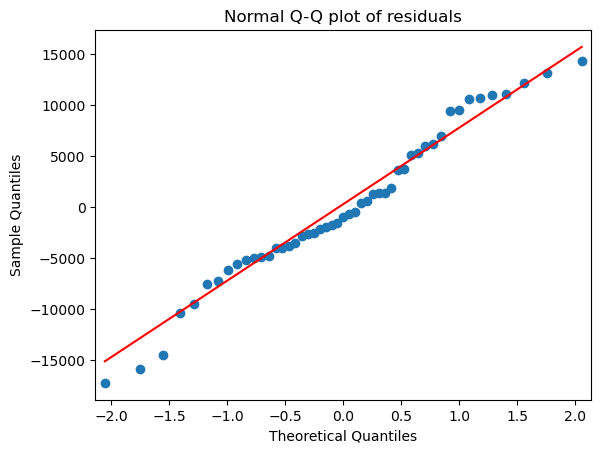

In [68]:
# Test for Normality of Residuals(Q-Q Plot)
# Residual  values = y-yhat
smf.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

#### As we can see that the error is normally and idependently distributed 

### Residual Plot for Homoscedasticity 

In [70]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

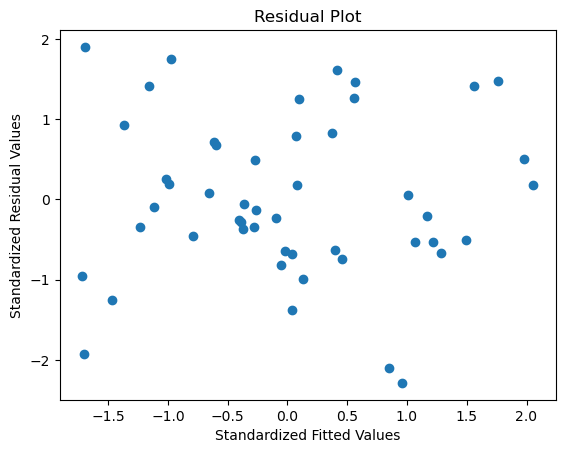

In [71]:
plt.scatter(get_standardized_values(final_model.fittedvalues),get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### Residual VS Regressors Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors.

eval_env: 1


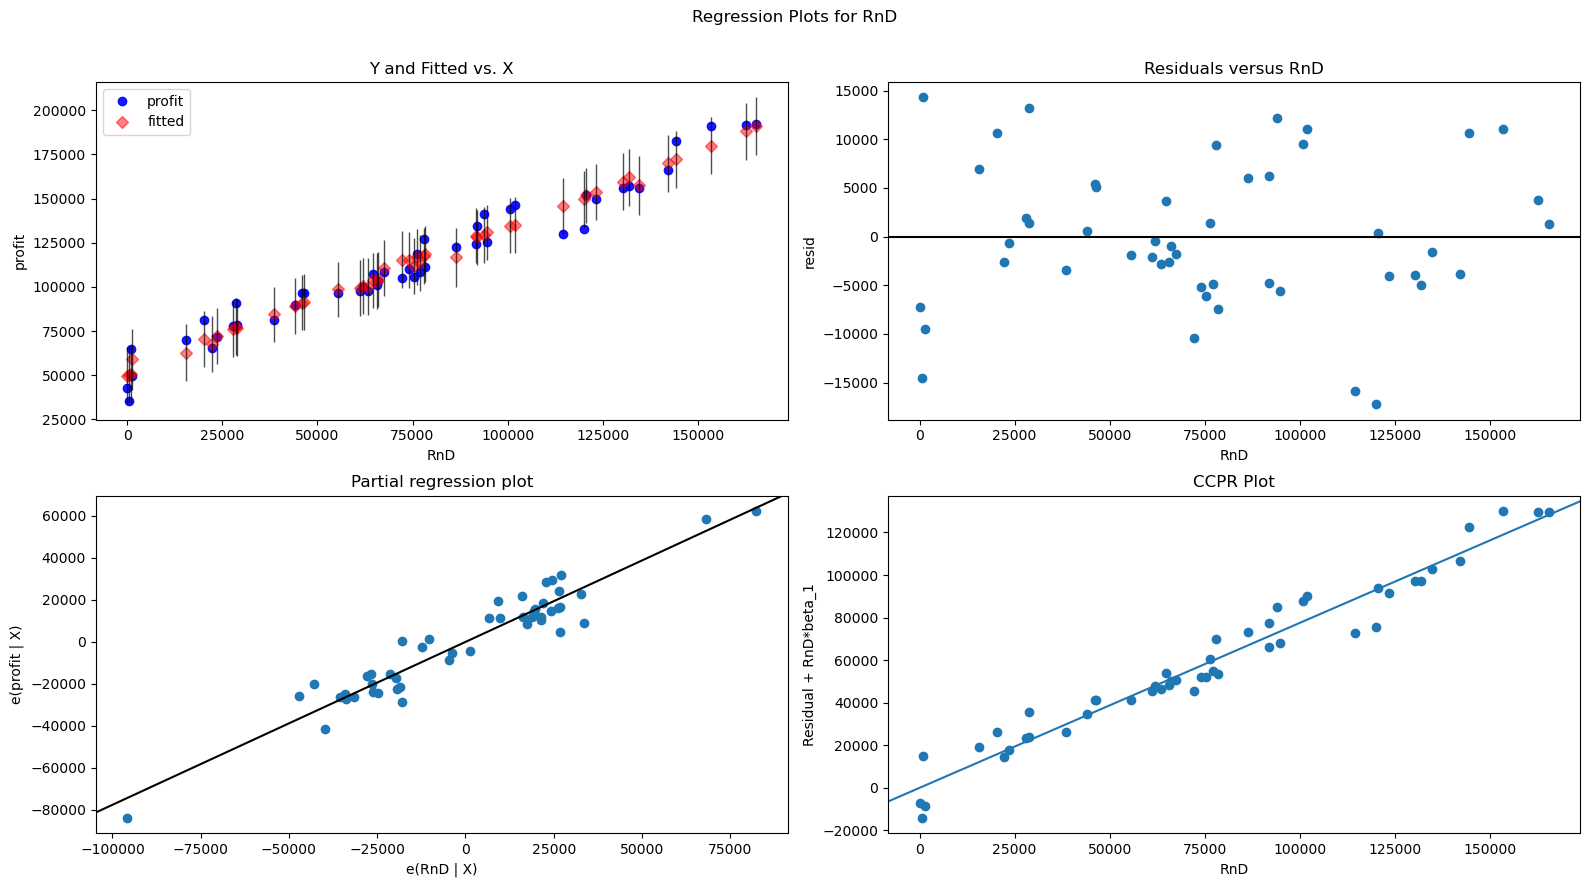

In [72]:
fig= plt.figure(figsize = (16,9))
plot_RnD = smf.graphics.plot_regress_exog(final_model,'RnD', fig = fig)
plt.show()

eval_env: 1


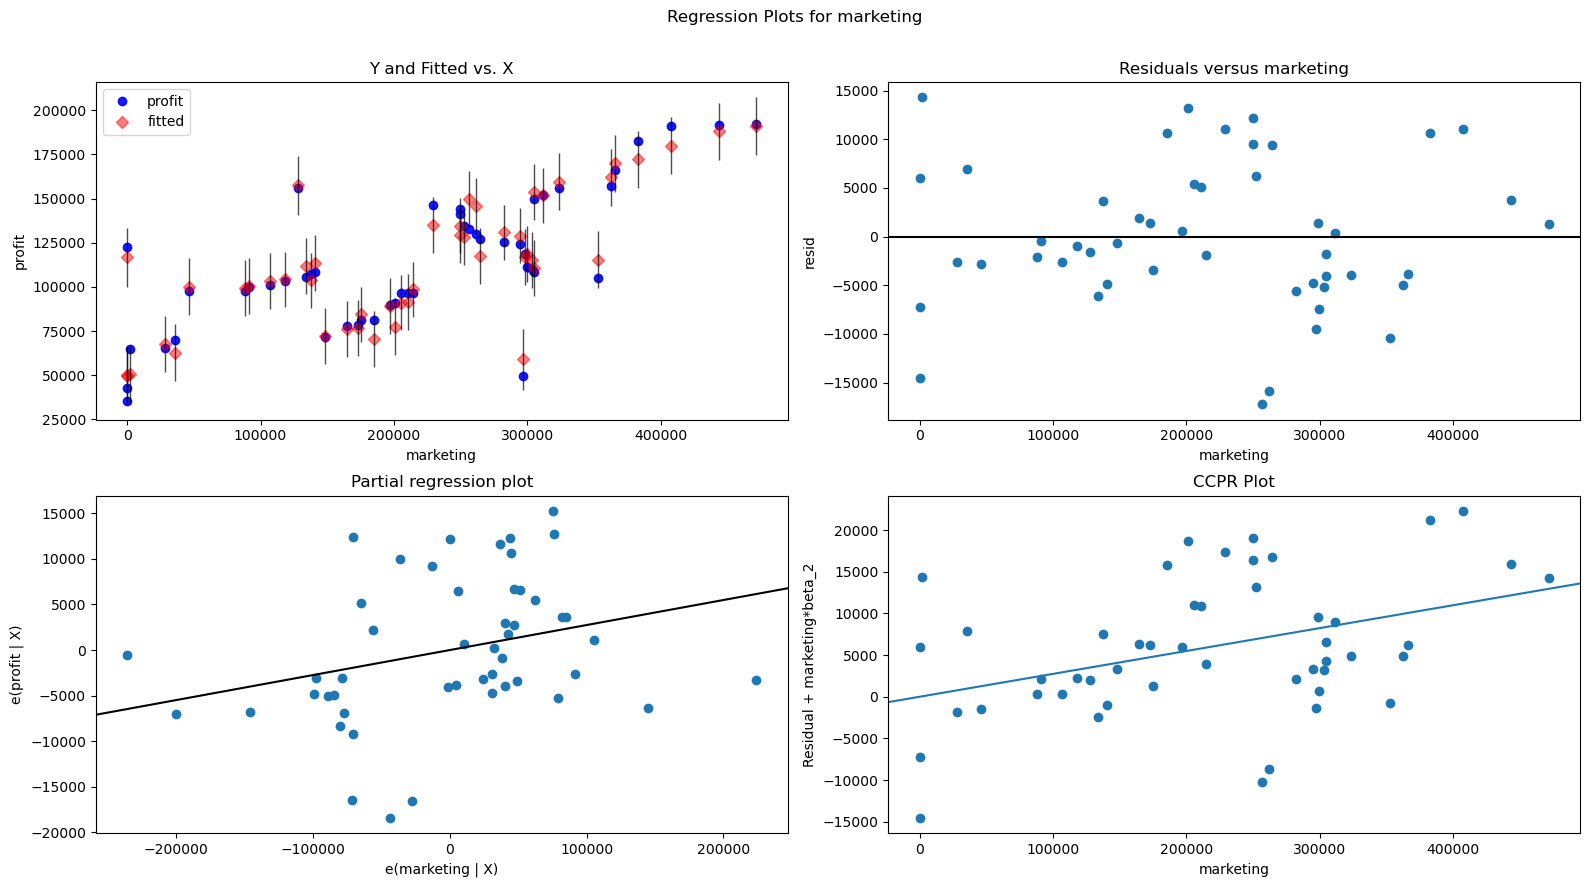

In [73]:
fig = plt.figure(figsize = (16,9))
plot_marketing = smf.graphics.plot_regress_exog(final_model, 'marketing', fig=fig)
plt.show()

#### Note: All our assumptions are satisfied. Hence, we can say our model is a good model let us test more to make it even better.

### Detecting Influencers/Outliers in the Model

In [74]:
# by using cook's Distance 
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

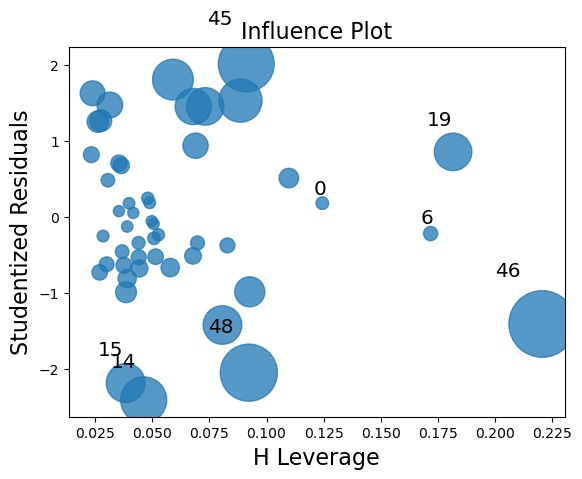

In [75]:
influence_plot(final_model)
plt.show()

In [76]:
k=df4.shape[1]
n=df4.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.37


#### Let's plot the influencers and also plot a cut off line using the stem plot

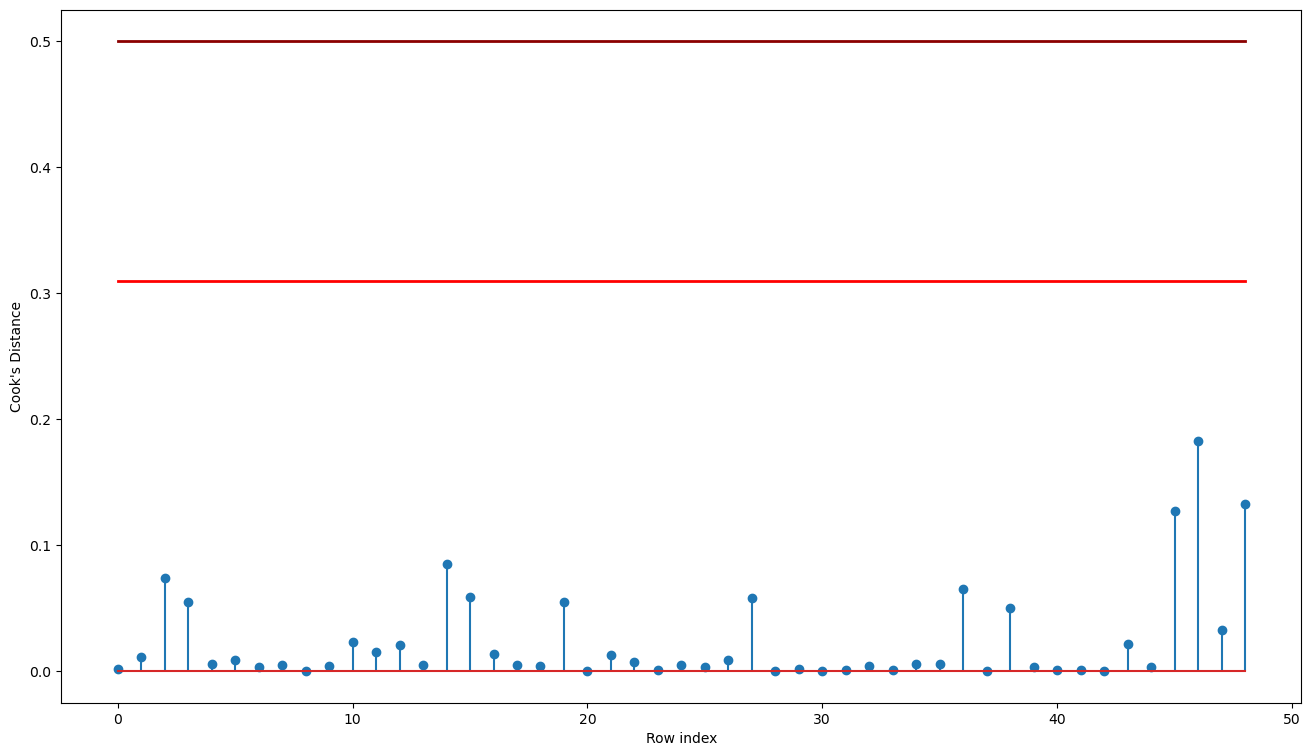

In [77]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

#### As we can see that All the points are below our cut-off line so we can say that there are no influncers present in the model

### Predicting values from model using same dataset

In [79]:
predicted = pd.DataFrame()
predicted['RnD'] = df4.RnD
predicted['marketing'] = df5.marketing
predicted['Profit'] = df4.profit
predicted['Predicted_Profit'] = pd.DataFrame(final_model.predict(predicted[['RnD','marketing']]))
predicted

,RnD,marketing,Profit,Predicted_Profit
0,165349.20,471784.10,192261.83,190942.726927
1,162597.70,443898.53,191792.06,188043.924520
2,153441.51,407934.54,191050.39,179957.312472
3,144372.41,383199.62,182901.99,172246.416164
4,142107.34,366168.42,166187.94,170022.687457
5,131876.90,362861.36,156991.12,161999.405410
6,134615.46,127716.82,156122.51,157669.178690
7,130298.13,323876.68,155752.60,159705.298181
8,120542.52,311613.29,152211.77,151804.380605
9,123334.88,304981.62,149759.96,153787.521922


In [80]:
display(df[df.index.isin([49])])

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [81]:
new_data = pd.DataFrame({'RnD':0.0,'marketing':45173.06},index=[0])
new_data

,RnD,marketing
0,0.0,45173.06


In [82]:
new_data['predited_profit']=final_model.predict(new_data)
new_data

,RnD,marketing,predited_profit
0,0.0,45173.06,51025.067542
